In [1]:
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [2]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/train_another/damage/*.jpeg")
x = np.array([np.array(imread(img)) for img in path])

In [2]:

feature_matrix = np.zeros((5000,128,128)) 

for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
        for k in range(0,x.shape[2]):
            feature_matrix[i][j][k] = ((int(x[i,j,k,0]) + int(x[i,j,k,1]) + int(x[i,j,k,2]))/3)

In [3]:
feature = np.reshape(feature_matrix,(5000,128*128))
x_reshape = np.reshape(x, (5000,128*128*3))

/Users/manishatakale/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


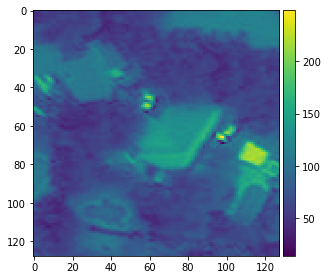

In [4]:
imshow(feature_matrix[0])

In [5]:
df = pd.DataFrame(feature)
damage = np.ones(5000) ##one => damage
df['damage'] = damage

In [6]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/train_another/no_damage/*.jpeg")
x_no = np.array([np.array(imread(img)) for img in path])

In [7]:
feature_matrix_no = np.zeros((5000,128,128)) 

In [8]:
for i in range(0,x_no.shape[0]):
    for j in range(0,x_no.shape[1]):
        for k in range(0,x_no.shape[2]):
            feature_matrix_no[i][j][k] = ((int(x_no[i,j,k,0]) + int(x_no[i,j,k,1]) + int(x_no[i,j,k,2]))/3)

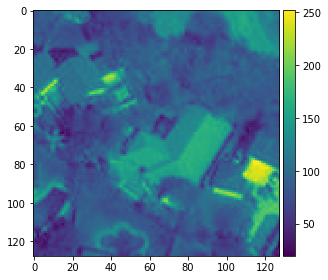

In [9]:
imshow(feature_matrix_no[0])

In [10]:
features_no = np.reshape(feature_matrix_no,(5000,(128*128)))

In [11]:
#label 1 => damage image 0=> no_damage
#no_damage=np.zeros(5000)
df_no = pd.DataFrame(features_no)
#df_no['no_damage'] = no_damage
data =pd.concat([df, df_no], axis=0)
data['damage'].fillna(0, inplace=True)
#data['no_damage'].fillna(1,inplace=True)
#data = data.drop(['no_damage'], axis=1)
data = data.rename(columns={"damage": "labels"})
data = data.sample(frac=1).reset_index(drop=True)

In [12]:
labels = data.pop('labels')

In [13]:
X_train,Y_train  = np.array(data.values),np.array(labels)

In [14]:
X_train.shape

(10000, 16384)

In [15]:
Y_train.shape

(10000,)

In [16]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/validation_another/damage/*.jpeg")
val_damage = np.array([np.array(imread(img)) for img in path])
val_matrix = np.zeros((5000,128,128)) 

for i in range(0,val_damage.shape[0]):
    for j in range(0,val_damage.shape[1]):
        for k in range(0,val_damage.shape[2]):
            val_matrix[i][j][k] = ((int(val_damage[i,j,k,0]) + int(val_damage[i,j,k,1]) + int(val_damage[i,j,k,2]))/3)

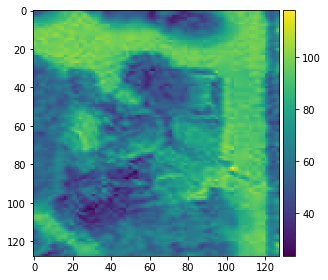

In [17]:
imshow(val_matrix[0])

In [18]:
path = glob.glob("/Users/manishatakale/Downloads/HackathonePractice/ImageData/validation_another/no_damage/*.jpeg")
val_damage_no = np.array([np.array(imread(img)) for img in path])
val_matrix_no = np.zeros((5000,128,128)) 

for i in range(0,val_damage_no.shape[0]):
    for j in range(0,val_damage_no.shape[1]):
        for k in range(0,val_damage_no.shape[2]):
            val_matrix_no[i][j][k] = ((int(val_damage_no[i,j,k,0]) + 
                                    int(val_damage_no[i,j,k,1]) + 
                                    int(val_damage_no[i,j,k,2]))/3)

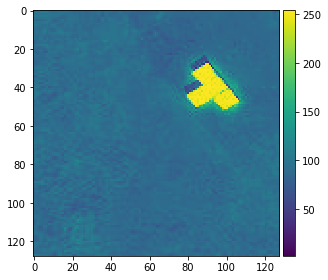

In [19]:
imshow(val_matrix_no[0])

In [20]:
val_matrix.shape

(5000, 128, 128)

In [21]:
val_matrix = np.reshape(val_matrix, (5000,128*128))
val_matrix_no = np.reshape(val_matrix_no, (5000,128*128))

In [22]:
val_matrix.shape

(5000, 16384)

In [23]:
val_matrix_no.shape

(5000, 16384)

In [24]:
#label 1 => damage image 0=> no_damage

df = pd.DataFrame(val_matrix)
damage = np.ones(5000)

df['damage'] = damage
df_no = pd.DataFrame(val_matrix_no)

val_data =pd.concat([df, df_no], axis=0)
val_data['damage'].fillna(0, inplace=True)

val_data = val_data.rename(columns={"damage": "labels"})
val_data = val_data.sample(frac=1).reset_index(drop=True)

In [25]:
Y_val = np.array(val_data.pop('labels'))

In [26]:
X_val = np.array(val_data.values)

In [27]:
X_val.shape

(10000, 16384)

In [28]:
Y_val.shape

(10000,)

In [29]:
np.save('X_train',X_train)
np.save('Y_train',Y_train)
np.save('X_val',X_val)
np.save('Y_val',Y_val)